## Trabalho Individual de Programação

- João Pedro Rolim Dias - nº 110305

### Classe Artigo (Paper)

In [1]:
# Importação das bibliotecas utilizadas ao longo do projeto

import matplotlib.pyplot as plt

In [2]:
# Definição da classe Artigo

class Artigo: 
    def __init__(self, titulo, autores):
        assert(len(titulo) > 0), 'O título não pode estar vazio'
        assert(len(autores) == len(set(autores))), 'Não podem haver autores repetidos'
        assert(all(map(lambda p: p.strip(), autores))), 'Os nomes dos autores da lista não podem estar vazios'
        self.__titulo = titulo
        self.__autores = autores

    @property
    def titulo(self):
        return self.__titulo

    @property
    def autores(self):
        return self.__autores

    # Converte um artigo numa cadeia de caracteres
    def __str__(self):
        return (f"Título do artigo: {self.__titulo}\nAutor/lista de autores: {self.__autores}")

    # Verifica se os dois artigos são iguais com base no seu título
    def __eq__(self, other):
        if not isinstance(other, self.__class__):
            return False
        else:
            return other.__titulo == self.__titulo

In [3]:
# Definição da classe Revisor

class Revisor:
    def __init__(self, revisor):
        assert(len(revisor) > 0), 'O nome do revisor não pode estar vazio'
        self.__revisor = revisor
        
    @property
    def revisor(self):
        return self.__revisor

    # Converte um revisor numa cadeia de caracteres
    def __str__(self): 
        return str(self.__revisor)

    # Verifica se os dois revisores são iguais com base no seu nome
    def __eq__(self, other): 
        if not isinstance(other, self.__class__):
            return False
        else:
            return other.__revisor == self.__revisor

### Classe Revisão (Review)

In [4]:
# Definição da classe Review

class Review:
    def __init__(self, revisor, titulo):
        assert(len(revisor) > 0), 'O nome do revisor não pode estar vazio'
        assert(len(titulo) > 0), 'O nome do artigo não pode estar vazio'
        self.__revisor = revisor
        self.__titulo = titulo
        self.aceite = False
        self.completa = False
        self.caixa_de_comentarios = [] #rever

    @property
    def revisor(self):
        return self.__revisor
    
    @property
    def titulo(self):
        return self.__titulo
    
    # Registo dos resultados e respetivos comentários dos revisores #rever
    def registo_do_resultado(self):
        estado = int(input('Para aceitar o artigo, prima a tecla 1. Para rejeitar, prima a tecla 2. Caso não pretenda registar ainda o seu parecer, prima a tecla 3.'))
        if estado == 1: 
            self.aceite = True
            self.completa = True
            comentario = str(input('Artigo aceite. Escreva aqui os seus comentários e as suas notas.'))
            self.caixa_de_comentarios.append(comentario)
        elif estado == 2:
            self.aceite = False
            self.completa = True
            comentario = str(input('Artigo rejeitado. Escreva aqui os seus comentários e as suas notas.'))
            self.caixa_de_comentarios.append(comentario)
        else:
            self.aceite = False
            self.completa = False
            print('A aguardar registo do resultado da revisão.')

    # Verificação do estado da revisão (resposta às questões: está completa? / quais foram os comentários? / foi aceite?)
    def verificar_registo(self):
        if self.completa == True:
            if self.aceite == True: 
                print('Revisão completa e artigo aceite.')
                return f"Comentários e notas: {self.caixa_de_comentarios}"
            elif self.aceite == False:
                print('Revisão completa e artigo rejeitado.')
                return f"Comentários e notas: {self.caixa_de_comentarios}"
        else:
            print('Revisão por preencher.')
            return 

    # Converte uma revisão numa cadeia de caracteres 
    def __str__(self):
        return f"Título do artigo: {self.__titulo}\nRevisor: {self.__revisor}\nRevisão aceite: {self.aceite}\nRevisão completa: {self.completa}\nComentários e notas: {self.caixa_de_comentarios}"

    # Verifica se duas revisões são iguais - se tiverem o mesmo revisor e o mesmo título
    def __eq__(self, other): 
        if not isinstance(other, self.__class__):
            return False
        else:
            return other.__revisor == self.__revisor and other.__titulo == self.__titulo
        

### Classe Conferência (Conference)

In [5]:
class Conferencia: 
    def __init__(self):
        self.__lista_de_reviews = []
        self.__lista_de_revisores = []
        self.__lista_de_artigos = []

    @property
    def lista_de_reviews(self):
        return self.__lista_de_reviews
    
    @property
    def lista_de_revisores(self):
        return self.__lista_de_revisores

    @property
    def lista_de_artigos(self):
        return self.__lista_de_artigos

    # Registar um novo artigo, cujo título não pode constar já na conferência
    def novo_artigo_conferencia(self, artigo):
        for i in self.__lista_de_artigos:
            if i.titulo == artigo.titulo:
                print('Artigo já registado na conferência.')
                return 
        self.__lista_de_artigos.append(artigo)
        print('Artigo registado com sucesso.')
        return 

    # Registar um novo revisor na conferência, dado o seu nome. O nome do revisor não pode ser repetido
    def novo_revisor_conferencia(self, revisor):
        for i in self.__lista_de_revisores:
            if i.revisor == revisor.revisor:
                print('Revisor já registado na conferência.')
                return 
        self.__lista_de_revisores.append(revisor)
        print('Revisor registado com sucesso.')
        return 
    
    # Registar a revisão de um artigo com um dado título por um revisor com um dado nome. Não pode existir já na conferência uma outra revisão do mesmo artigo pelo mesmo revisor
    def nova_revisao_conferencia(self, revisao):
        for i in self.__lista_de_reviews:
            if i == revisao:
                print('O revisor já está encarregado desse artigo.')
                return 
        for artigo in self.__lista_de_artigos:
            if artigo.titulo == revisao.titulo:
                for revisor in self.__lista_de_revisores:
                    if revisor.revisor == revisao.revisor:
                        self.__lista_de_reviews.append(revisao)
                        print('Review registada com sucesso.')
                        return
                print('Revisor não existe na conferência.')
                return 

    # Registar o resultado de uma revisão de um artigo com um dado título por um revisor com um dado nome. Tem de haver já uma revisão desse artigo por esse revisor, revisão essa que não pode estar terminada. O resultado indica se o artigo foi aceite (ou não) e um comentário;
    def registo_resultado_conferencia(self, revisao):
        for i in self.__lista_de_reviews:
            if i == revisao: 
                if i.completa == False:
                    i.registo_do_resultado()
                    print('Registo concluído com sucesso.')
                    return 
                print('O registo do resultado para esta revisão já foi concluído.')
                return 

    # Obter um artigo dado o seu título
    def get_artigo(self, titulo):
        for i in self.__lista_de_artigos:
            if i.titulo == titulo:
                return i

    # Saber o número de artigos na conferência
    def count_artigos(self):
        return len(self.__lista_de_artigos)

    # Saber o número de revisores na conferência
    def count_revisores(self):
        return len(self.__lista_de_revisores)

    # Saber o número de revisões em falta (i.e., incompletas) na conferência
    def revisoes_em_falta(self):
        a = []
        for i in self.__lista_de_reviews:
            if i.completa == False:
                a.append(i)
        return len(a)

    # Saber se está registado na conferência um artigo com um dado título
    def existe_artigo(self, artigo):
        for i in self.__lista_de_artigos:
            if i.titulo == artigo:
                return True
        return False     

    # Saber se está registado na conferência um revisor com um dado nome
    def existe_revisor(self, revisor):
        for i in self.__lista_de_revisores:
            if i.revisor == revisor:
                return True
        return False

    # Saber se está registada na conferência a revisão de um artigo com um dado título por um revisor com um dado nome
    def existe_review(self, revisor, titulo):
        for i in self.__lista_de_reviews:
            if i.revisor == revisor and i.titulo == titulo:
                return True
        return False

    # Saber se já há na conferência uma revisão terminada de um artigo com um dado título por um revisor com um dado nome
    def verificar_review(self, revisor, titulo):
        for i in self.__lista_de_reviews:
            if i.revisor == revisor and i.titulo == titulo and i.completa == True:
                return True
        return False

    # Saber se foi aceite um artigo com um dado título por um revisor com um dado nome
    def aceite_review(self, revisor, titulo):
        for i in self.__lista_de_reviews:
            if i.revisor == revisor and i.titulo == titulo and i.aceite == True:
                return True
        return False

    # Separar em listas as reviews aprovadas/reprovadas/por rever
    def aprovacao_artigos(self, artigo):
        reviews_aprovados = []
        reviews_rejeitados = []
        reviews_por_rever = []
        for i in self.__lista_de_reviews:
            if i.titulo == artigo:
                if i.completa == False:
                    reviews_por_rever.append(i)
                elif i.aceite == False:
                    reviews_rejeitados.append(i)
                else:
                    reviews_aprovados.append(i)
        return reviews_aprovados, reviews_rejeitados, reviews_por_rever

    # Saber se determinado artigo foi aprovado/reprovado
    def aprovar_artigos (self, titulo):
        total = []
        for i in self.__lista_de_reviews:
            if i.titulo == titulo:
                total.append(i)
        for i in total: 
            if i.completa == True:
                if i.aceite == False:
                    return False
            else: 
                return False 
        return True

    # Saber se um artigo está por rever, i.e., se alguma das suas revisões está ainda por completar
    def artigo_por_rever(self, titulo):
        total = []
        for i in self.__lista_de_reviews:
            if i.titulo == titulo:
                total.append(i)
        for i in total:
            if i.completa == False:
                return True
        return False

    # Saber se há um artigo em revisao
    def existe_artigo_em_revisao(self, artigo):
        for i in self.__lista_de_reviews:
            if i.titulo == artigo:
                return True
        return False  

    # Saber quantos artigos estão sem revisões associadas
    def artigos_sem_revisoes(self):
        i = 0 
        for artigo in self.__lista_de_artigos:
            encontrado = False
            for revisao in self.__lista_de_reviews:
                if artigo.titulo == revisao.titulo:
                    encontrado = True
            if not encontrado:
                i += 1 
        return i 

    # Mostrar as revisões de um artigo com um determinado título
    def show_revisoes_artigo(self, titulo):
        for i in self.__lista_de_reviews:
            if i.titulo == titulo: 
                print(i)
            
    # Estado da conferência - versão final
    def estado_conferenc(self):
        artigos_aceites = []
        artigos_recusados = []
        artigos_por_rever = []
        elementos_imprimidos = []
        for i in self.__lista_de_reviews:
            if self.artigo_por_rever(i.titulo) == True:
                artigos_por_rever.append(i)
            elif self.aprovar_artigos(i.titulo) == False: 
                artigos_recusados.append(i)
            else:
                artigos_aceites.append(i)
        print('*** Artigos aceites:')
        for i in artigos_aceites:
            if i in elementos_imprimidos:
                continue
            print(str(self.get_artigo(i.titulo).autores) + "; " + str(i.titulo))
            for y in artigos_aceites:
                if y in elementos_imprimidos:
                    continue
                if i.titulo == y.titulo: 
                    print('* ' + str(y.revisor) + ": Aceite - " + str(y.aceite) + "; Comentários: " + str(y.caixa_de_comentarios))
                    elementos_imprimidos.append(y)
            elementos_imprimidos.append(i)
        print('*** Artigos rejeitados:')
        for i in artigos_recusados:
            if i in elementos_imprimidos:
                continue
            print(str(self.get_artigo(i.titulo).autores) + "; " + str(i.titulo))
            for y in artigos_recusados:
                if y in elementos_imprimidos:
                    continue
                if i.titulo == y.titulo: 
                    print('* ' + str(y.revisor) + ": Aceite - " + str(y.aceite) + "; Comentários: " + str(y.caixa_de_comentarios))
                    elementos_imprimidos.append(y)
            elementos_imprimidos.append(i)
        print('*** Artigos por rever:')
        for i in artigos_por_rever:
            if i in elementos_imprimidos:
                continue
            print(str(self.get_artigo(i.titulo).autores) + "; " + str(i.titulo))
            for y in artigos_por_rever:
                if y in elementos_imprimidos:
                    continue
                if i.titulo == y.titulo: 
                    print('* ' + str(y.revisor) + ": Aceite - " + str(y.aceite) + "; Comentários: " + str(y.caixa_de_comentarios))
                    elementos_imprimidos.append(y)
            elementos_imprimidos.append(i)
                    
    # Funções criadas para visualização das três listas da classe
    def show_artigos(self):
        for i in self.__lista_de_artigos:
            print(str(i))

    def show_revisores(self):
        for i in self.__lista_de_revisores:
            print(str(i))

    def show_reviews(self):
        for i in self.__lista_de_reviews:
            print(str(i))

    # T5: Estatísticas
    # Média de autores por artigo
    def media_autores(self):
        autores_por_artigo = []
        for i in self.__lista_de_artigos:
            b = len(i.autores)
            autores_por_artigo.append(b)
        total_autores = sum(autores_por_artigo)
        media = total_autores/len(self.__lista_de_artigos)
        return media

    # Média de artigos revistos por revisor
    def media_artigos(self):
        artigos_por_revisor = {}
        for i in self.__lista_de_reviews:
            if i.revisor in artigos_por_revisor:
                artigos_por_revisor[i.revisor] += 1
            else:
                artigos_por_revisor[i.revisor] = 1
        total_artigos = sum(artigos_por_revisor.values())
        total_revisores = len(artigos_por_revisor.keys())
        media = total_artigos/total_revisores
        return media

    # Média de revisores por artigo
    def media_revisores(self):
        revisores_por_artigo = {}
        for i in self.__lista_de_reviews:
            if i.titulo in revisores_por_artigo:
                revisores_por_artigo[i.titulo] += 1
            else:
                revisores_por_artigo[i.titulo] = 1
        total_revisores = sum(revisores_por_artigo.values())
        total_artigos = len(revisores_por_artigo.keys())
        media = total_revisores/total_artigos
        return media

    # Quantos revisores fizeram uma revisão, quantos fizeram duas revisões, etc. 
    def hist_stat(self):
        artigos_por_revisor = {}
        final_dic = {}
        for x in self.__lista_de_reviews:
            if x.revisor in artigos_por_revisor:
                artigos_por_revisor[x.revisor] += 1
            else:
                artigos_por_revisor[x.revisor] = 1
        for y in artigos_por_revisor.values():
            if y in final_dic:
                final_dic[y] += 1 # keys são são as revisões / values são os revisores
            else:
                final_dic[y] = 1
        plt.xticks(range(1, int(sum(final_dic.keys())) + 1))
        plt.yticks(range(1, int(sum(final_dic.values())) + 1))
        plt.bar(final_dic.keys(), final_dic.values())
        plt.xlabel('Revisões')
        plt.ylabel('Revisores')
        plt.show()

### Programa

In [6]:
def main():
    conf = Conferencia()
    while True:
        escolha = input('1. Introduzir novo artigo \n2. Introduzir novo revisor\n3. Introduzir nova revisão\n4. Introduzir resultado da conferência\n5. Estado da conferência\n6. Estatísticas\n7. Sair')
        if escolha == "1":
            titulo_artigo = input('Introduza o nome do artigo que deseja acrescentar à conferência.')
            numero_de_autores = int(input('Digite o número de autores do artigos.'))
            lista_de_autores = []
            while numero_de_autores <= 0: 
                numero_de_autores = int(input('É obrigatório definir pelo menos um autor. Indique novamente o número de autores que pretende inserir.'))
            while numero_de_autores != 0: 
                autor = str(input(f"Digite o nome do autor {numero_de_autores}"))
                if autor in lista_de_autores:
                    print('Autor já registado.')
                    numero_de_autores -= 1
                else:
                    lista_de_autores.append(autor)
                    numero_de_autores -= 1
            conf.novo_artigo_conferencia(Artigo(str(titulo_artigo), list(lista_de_autores)))
        elif escolha == "2":
            selecao_revisor = str(input('Introduza o nome do revisor que deseja acrescentar à conferência.'))
            while len(selecao_revisor) == 0: 
                selecao_revisor = str(input('Por favor, coloque um nome válido.'))
            conf.novo_revisor_conferencia(Revisor(str(selecao_revisor)))
        elif escolha == "3":
            selecao_review = str(input('Introduza o título do artigo para revisão.'))
            revisor_review = str(input('Indique o nome do revisor alocado ao artigo.'))
            conf.nova_revisao_conferencia(Review(str(revisor_review), str(selecao_review)))
        elif escolha == "4":
            review_escolhida = str(input('Introduza o título do artigo para revisão.'))
            revisor_escolhido = str(input('Indique o nome do revisor alocado ao artigo.'))
            conf.registo_resultado_conferencia(Review(str(revisor_escolhido), str(review_escolhida)))
        elif escolha == "5":
            conf.estado_conferenc()
        elif escolha == "6":
            print('Média de autores por artigo :' + str(conf.media_autores()))
            print('Média de artigos por revisor: ' + str(conf.media_artigos()))
            print('Média de revisores por artigo: ' + str(conf.media_revisores()))
            conf.hist_stat()
        elif escolha == "7":
            print('Programa terminado.') 
            a = open(str(input('Escreva o nome do ficheiro onde pretende guardar a informação da conferência'))+'.txt', 'w')
            a.write(str(len(conf.lista_de_artigos)) + "\n")
            for i in conf.lista_de_artigos:
                a.write(str(i.titulo) + ";" + str(len(i.autores)) + ";" + str(i.autores) + "\n")
            a.close()
            return False

Artigo registado com sucesso.
Revisor registado com sucesso.
Revisor registado com sucesso.
Artigo registado com sucesso.
Review registada com sucesso.
Review registada com sucesso.
Registo concluído com sucesso.
*** Artigos aceites:
['pedro', 'andre']; teste1
* r1: Aceite - True; Comentários: ['esta ok']
*** Artigos rejeitados:
*** Artigos por rever:
['joao', 'rafael', 'pedro']; teste2
* r2: Aceite - False; Comentários: []
Review registada com sucesso.
*** Artigos aceites:
*** Artigos rejeitados:
*** Artigos por rever:
['pedro', 'andre']; teste1
* r1: Aceite - True; Comentários: ['esta ok']
* r2: Aceite - False; Comentários: []
['joao', 'rafael', 'pedro']; teste2
* r2: Aceite - False; Comentários: []
Média de autores por artigo :2.5
Média de artigos por revisor: 1.5
Média de revisores por artigo: 1.5


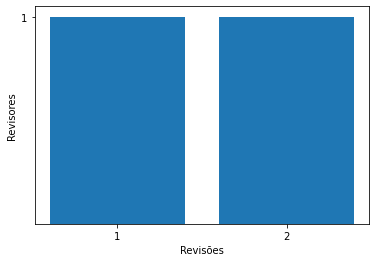

Registo concluído com sucesso.
*** Artigos aceites:
*** Artigos rejeitados:
['pedro', 'andre']; teste1
* r1: Aceite - True; Comentários: ['esta ok']
* r2: Aceite - False; Comentários: ['pessimo']
*** Artigos por rever:
['joao', 'rafael', 'pedro']; teste2
* r2: Aceite - False; Comentários: []
Programa terminado.


False

In [7]:
main()